# Hola Jorge!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error laa primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2
    
Hola, Jorge, te felicito por la culminación del proyecto. Muy buen trabajo.

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la introducción proyecto.
 </div>

## Preparación

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import catboost as cb


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo importando las librerías necesarias para el desarrollo del proyecto.</div>

Se importaron las librerías necesarias, incluyendo pandas, numpy, matplotlib, scikit-learn, statsmodels, lightgbm y catboost.

In [2]:
#Cargar el archivo CSV
data = pd.read_csv('/datasets/taxi.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la carga del dataset.</div> 

Se cargó el archivo CSV llamado 'taxi.csv' en un DataFrame llamado 'data'.

In [3]:
#Mostrar las primeras filas del DataFrame
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Se utilizó el método `head()` para mostrar las primeras filas del DataFrame 'data', lo que permite echar un vistazo inicial a los datos.

In [4]:
#Obtener información general sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Se utilizó el método info() para obtener información general sobre el DataFrame 'data', incluyendo el número de filas y columnas, los tipos de datos y la cantidad de valores no nulos en cada columna.

In [5]:
#Revisar si hay valores nulos en el DataFrame
print("Valores nulos en el DataFrame:")
print(data.isnull().sum())

Valores nulos en el DataFrame:
datetime      0
num_orders    0
dtype: int64


Se utilizó el método `isnull().sum()` para contar la cantidad de valores nulos en cada columna del DataFrame 'data'. No se encontraron valores nulos.

In [6]:
#Descripción estadística de las columnas numéricas
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Se utilizó el método `describe()` para obtener estadísticas descriptivas de la columna 'num_orders', que muestra el número de órdenes de taxi en cada período de tiempo.

In [7]:
#Establecer el índice igual a la columna datetime
data.set_index('datetime', inplace=True)

Se utilizó el método `set_index()` para establecer la columna 'datetime' como el índice del DataFrame 'data'.


In [8]:
#Convertir el índice a un objeto de fecha y hora
data.index = pd.to_datetime(data.index)

 Se utilizó el método `pd.to_datetime()` para convertir el índice del DataFrame 'data' en un objeto de fecha y hora.

In [9]:
#Verificar si las fechas y horas están en orden cronológico
orden_cro = data.index.is_monotonic
print("Las fechas y horas están en orden cronológico:", orden_cro)

Las fechas y horas están en orden cronológico: True


 Se utilizó el atributo `is_monotonic` del índice para verificar si las fechas y horas están en orden cronológico.


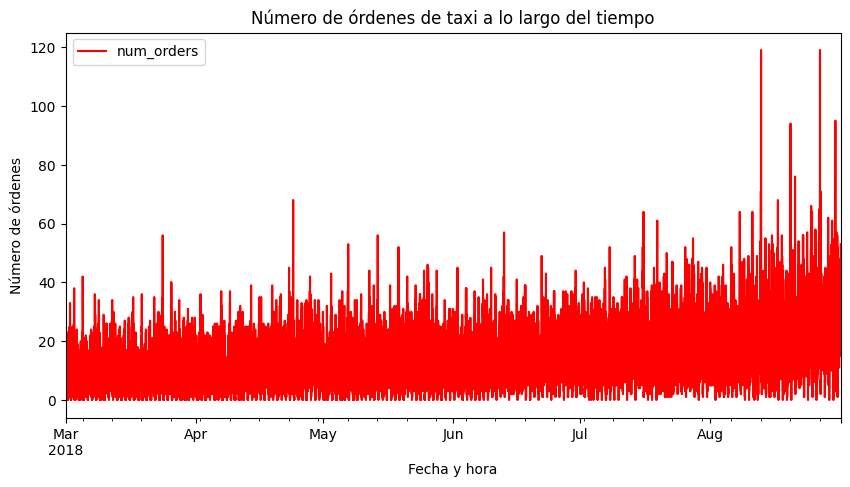

In [10]:
#Trazar el gráfico de series temporales
data.plot(color='red', figsize=(10, 5))
plt.title('Número de órdenes de taxi a lo largo del tiempo')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de órdenes')
plt.show()

 Se utilizó el método `plot()` para trazar el número de órdenes de taxi a lo largo del tiempo.


In [11]:
#Volver a obtener información general sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Se utilizó el método `info()` nuevamente para obtener información actualizada sobre el DataFrame después de los cambios realizados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con esta exploración inicial de los datos, Jorge. Utilizas componentes útiles e importantes de análisis.  </div>

En resumen, se realizaron los siguentes pasos:

1. **Importar librerías**

2. **Cargar el archivo CSV**

3. **Mostrar las primeras filas del DataFrame**

4. **Obtener información general sobre el DataFrame**

5. **Revisar si hay valores nulos en el DataFrame**

6. **Descripción estadística de las columnas numéricas**

7. **Establecer el índice igual a la columna datetime**

8. **Convertir el índice a un objeto de fecha y hora**

9. **Verificar si las fechas y horas están en orden cronológico**
10. **Trazar el gráfico de series temporales**

11. **Volver a obtener información general sobre el DataFrame**

Después de realizar los pasos de preparación de datos, podemos observar que los datos están limpios, bien estructurados, completos y listos para ser utilizados en análisis.  La columna 'datetime' se convirtió en el índice del DataFrame y se transformó en un objeto de fecha y hora, lo que facilitará el análisis y la visualización de series temporales.  Verificamos que las fechas y horas estén en orden cronológico ya que es importante para el análisis de series temporales. Se realizo una exploración visual mediante el grafico para visualizar los patrones en el número de órdenes de taxi a lo largo del tiempo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, muy buen trabajo con este resumen de la sección. Excelente trabajo. </div>

## Análisis

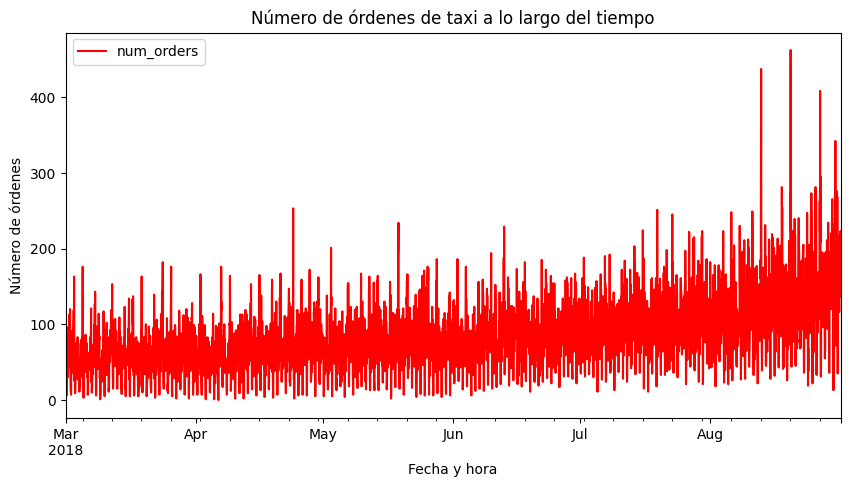

In [12]:
#Remuestrear los datos por hora y sumar el número de órdenes en cada hora
data = data.resample('1H').sum()
data.plot(color='red', figsize=(10, 5))
plt.title('Número de órdenes de taxi a lo largo del tiempo')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de órdenes')
plt.show()

Se realizo un remuestreo por una hora y se sumó el número de órdenes en cada hora. Se trazó un gráfico de la serie temporal remuestreada para visualizar cómo varía el número de órdenes a lo largo del tiempo

In [13]:
#Volver a mostrar las primeras filas del DataFrame
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


Se utilizó el método `head()` para mostrar las primeras filas del DataFrame remuestreado.

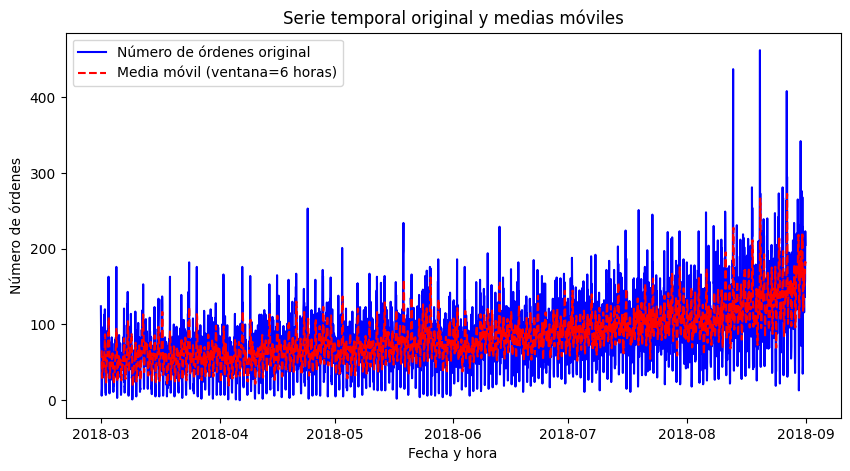

In [14]:
# Calcular la media móvil con una ventana de tamaño 6
media_movil_6h = data['num_orders'].rolling(window=6).mean()

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['num_orders'], label='Número de órdenes original', color='blue')
plt.plot(data.index, media_movil_6h, label='Media móvil (ventana=6 horas)', color='red', linestyle='--')
plt.title('Serie temporal original y medias móviles')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de órdenes')
plt.legend()
plt.show()

Se calculó la media móvil con una ventana de tamaño de 6 horas. Se trazaron la serie temporal original y la media móvil calculada en el mismo gráfico para compararlas.

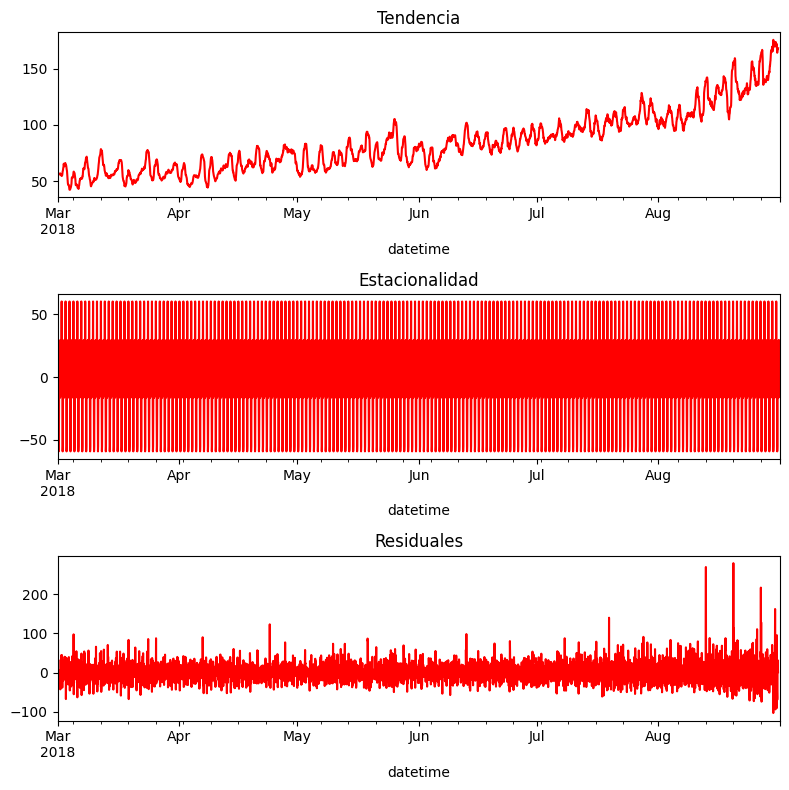

In [15]:
#Analizar las tendencias y la estacionalidad
decomposed = seasonal_decompose(data)

# Trazar las componentes
plt.figure(figsize=(8, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), color='red')
plt.title('Tendencia')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca(), color='red')
plt.title('Estacionalidad')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca(), color='red')
plt.title('Residuales')
plt.tight_layout()
plt.show()

Se utilizó la descomposición estacional para separar la serie temporal en sus componentes de tendencia, estacionalidad y residuales. Esto nos ayuda a entender mejor los patrones de la serie temporal.

In [16]:
#Calcular las diferencias entre elementos vecinos utilizando el método shift()
diferencias_shift = data - data.shift()
diferencias_shift.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,NaN
2018-03-01 01:00:00,-39.0
2018-03-01 02:00:00,-14.0
2018-03-01 03:00:00,-5.0
2018-03-01 04:00:00,-23.0
2018-03-01 05:00:00,-37.0
2018-03-01 06:00:00,6.0
2018-03-01 07:00:00,3.0
2018-03-01 08:00:00,19.0


Se calcularon las diferencias entre elementos vecinos utilizando el método `shift()`. Esto nos permite identificar patrones de cambio en la serie temporal.


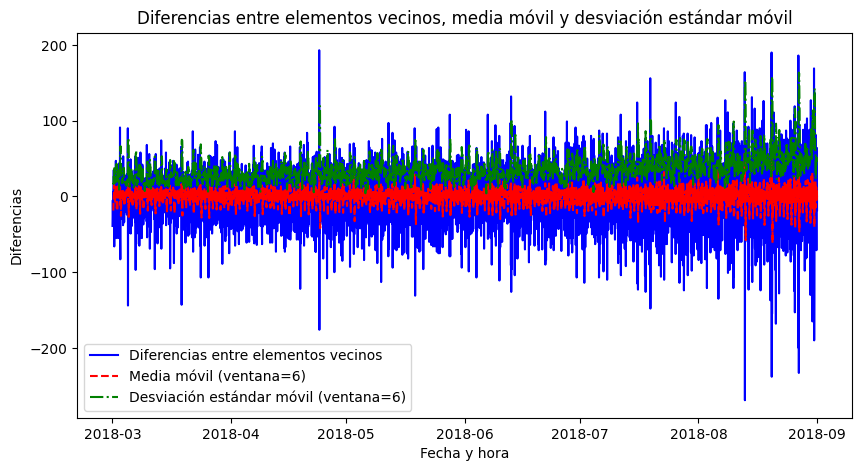

In [17]:
#Calcular la media móvil y la desviación estándar móvil con una ventana de tamaño 6
media_movil = diferencias_shift.rolling(6).mean()
std_movil = diferencias_shift.rolling(6).std()

plt.figure(figsize=(10, 5))
plt.plot(diferencias_shift.index, diferencias_shift, label='Diferencias entre elementos vecinos', color='blue')
plt.plot(media_movil.index, media_movil, label='Media móvil (ventana=6)', color='red', linestyle='--')
plt.plot(std_movil.index, std_movil, label='Desviación estándar móvil (ventana=6)', color='green', linestyle='-.')
plt.title('Diferencias entre elementos vecinos, media móvil y desviación estándar móvil')
plt.xlabel('Fecha y hora')
plt.ylabel('Diferencias')
plt.legend()
plt.show()

Se calculó la media móvil y la desviación estándar móvil de las diferencias entre elementos vecinos con una ventana de tamaño 6 horas. Esto nos ayuda a identificar patrones de variabilidad en las diferencias entre los valores de la serie temporal.

En resumen, se realizaron los siguentes pasos:

1. **Remuestreo de los datos por hora y suma de órdenes**

2. **Visualización de la serie temporal remuestreada**

3. **Cálculo de la media móvil**

4. **Visualización de la serie temporal original y la media móvil**

5. **Análisis de tendencias y estacionalidad**

6. **Cálculo de las diferencias entre elementos vecinos**

7. **Cálculo de la media móvil y la desviación estándar móvil de las diferencias**

Despues de realizar el análisis de datos, observamos información valiosa sobre la serie temporal de órdenes de taxi, incluyendo tendencias, estacionalidad y variabilidad. Esto nos ayuda para la construcción de modelos predictivos.






<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, Jorge. Usas secciones interesantes e importantes en el desarrollo de esta sección de análisis de componentes propios de la serie de tiempo.  </div>

## Formación

In [18]:
#Mostrar el Dataframe
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


Se utilizó el método `head()` para mostrar las primeras filas del DataFrame

In [19]:
#Creación de Caracteristicas del Calendario, Desface y Media Movil
def hacer_funciones(data, max_lag, rolling_mean_size):
    data['año'] = data.index.year
    data['mes'] = data.index.month
    data['dia'] = data.index.day
    data['dia_semana'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['desfase_{}'.format(lag)] = data['num_orders'].shift(lag)  # Cambiar el nombre de la columna aquí
    
    data['media_movil'] = (data['num_orders'].shift().rolling(rolling_mean_size).mean())

hacer_funciones(data, 5, 5)
data.head(10)

,num_orders,año,mes,dia,dia_semana,desfase_1,desfase_2,desfase_3,desfase_4,desfase_5,media_movil
datetime,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN
2018-03-01 05:00:00,6,2018,3,1,3,43.0,66.0,71.0,85.0,124.0,77.8
2018-03-01 06:00:00,12,2018,3,1,3,6.0,43.0,66.0,71.0,85.0,54.2
2018-03-01 07:00:00,15,2018,3,1,3,12.0,6.0,43.0,66.0,71.0,39.6
2018-03-01 08:00:00,34,2018,3,1,3,15.0,12.0,6.0,43.0,66.0,28.4


Se construyo una función para agregar caracteristicas de calendario como año, mes, día y día de la semana, características de desfase y calculo de la media movil.

In [20]:
#Agregar las Características de Tendencia y Estacionalidad
data['tendencia'] = decomposed.trend.values
data['estacionalidad'] = decomposed.seasonal.values
data.head(10)

,num_orders,año,mes,dia,dia_semana,desfase_1,desfase_2,desfase_3,desfase_4,desfase_5,media_movil,tendencia,estacionalidad
datetime,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.248112
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,20.177074
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,28.982743
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,17.885407
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,2.791145
2018-03-01 05:00:00,6,2018,3,1,3,43.0,66.0,71.0,85.0,124.0,77.8,NaN,-41.563022
2018-03-01 06:00:00,12,2018,3,1,3,6.0,43.0,66.0,71.0,85.0,54.2,NaN,-59.182671
2018-03-01 07:00:00,15,2018,3,1,3,12.0,6.0,43.0,66.0,71.0,39.6,NaN,-55.104461
2018-03-01 08:00:00,34,2018,3,1,3,15.0,12.0,6.0,43.0,66.0,28.4,NaN,-11.212840


 Se agregaron las caracterisitcas de tendencia y estacionalidad obtenidas mediante la descomposición estacional de la serie temporal.


In [21]:
#Agregar la Característica de Desviación Estandar
data['std_movil'] = std_movil

data.head(10)

,num_orders,año,mes,dia,dia_semana,desfase_1,desfase_2,desfase_3,desfase_4,desfase_5,media_movil,tendencia,estacionalidad,std_movil
datetime,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.248112,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,20.177074,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,28.982743,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,17.885407,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,2.791145,NaN
2018-03-01 05:00:00,6,2018,3,1,3,43.0,66.0,71.0,85.0,124.0,77.8,NaN,-41.563022,NaN
2018-03-01 06:00:00,12,2018,3,1,3,6.0,43.0,66.0,71.0,85.0,54.2,NaN,-59.182671,17.806366
2018-03-01 07:00:00,15,2018,3,1,3,12.0,6.0,43.0,66.0,71.0,39.6,NaN,-55.104461,16.415440
2018-03-01 08:00:00,34,2018,3,1,3,15.0,12.0,6.0,43.0,66.0,28.4,NaN,-11.212840,20.497967


Se agrego el calculo de la desviación estándar móvil para capturar la variabilidad de la serie temporal.

In [22]:
#Eliminar filas con valores nulos
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4392 entries, 2018-03-01 12:00:00 to 2018-08-31 11:00:00
Freq: H
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_orders      4392 non-null   int64  
 1   año             4392 non-null   int64  
 2   mes             4392 non-null   int64  
 3   dia             4392 non-null   int64  
 4   dia_semana      4392 non-null   int64  
 5   desfase_1       4392 non-null   float64
 6   desfase_2       4392 non-null   float64
 7   desfase_3       4392 non-null   float64
 8   desfase_4       4392 non-null   float64
 9   desfase_5       4392 non-null   float64
 10  media_movil     4392 non-null   float64
 11  tendencia       4392 non-null   float64
 12  estacionalidad  4392 non-null   float64
 13  std_movil       4392 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 514.7 KB


Se eliminaron las filas que contienen valores nulos resultantes de las operaciones anteriores.

In [23]:
#Estandarizado de datos
caracteristicas_numericas = ['año', 'mes', 'dia', 'dia_semana', 'desfase_1', 'desfase_2', 'desfase_3', 'desfase_4', 'desfase_5', 'media_movil', 'tendencia', 'estacionalidad', 'std_movil']
scaler = StandardScaler()
data[caracteristicas_numericas] = scaler.fit_transform(data[caracteristicas_numericas])
data.head(10)

/tmp/ipykernel_134/3502551312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[caracteristicas_numericas] = scaler.fit_transform(data[caracteristicas_numericas])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,num_orders,año,mes,dia,dia_semana,desfase_1,desfase_2,desfase_3,desfase_4,desfase_5,media_movil,tendencia,estacionalidad,std_movil
datetime,,,,,,,,,,,,,,
2018-03-01 12:00:00,30,0.0,-1.467057,-1.68422,-0.001369,0.262378,-0.451543,-0.339453,-1.121504,-1.545930,-0.839932,-1.069800,-0.639361,-0.018929
2018-03-01 13:00:00,32,0.0,-1.467057,-1.68422,-0.001369,-1.210835,0.263188,-0.451218,-0.338835,-1.121133,-0.751794,-1.069008,-0.510538,-0.018803
2018-03-01 14:00:00,48,0.0,-1.467057,-1.68422,-0.001369,-1.166192,-1.210945,0.264078,-0.450645,-0.338613,-0.763546,-1.038124,-0.351449,-0.032459
2018-03-01 15:00:00,66,0.0,-1.467057,-1.68422,-0.001369,-0.809050,-1.166274,-1.211219,0.264937,-0.450402,-0.886939,-1.036540,0.142689,-0.170123
2018-03-01 16:00:00,43,0.0,-1.467057,-1.68422,-0.001369,-0.407264,-0.808909,-1.166513,-1.210951,0.265045,-0.875188,-1.056338,1.131931,-0.100586
2018-03-01 17:00:00,44,0.0,-1.467057,-1.68422,-0.001369,-0.920657,-0.406872,-0.808865,-1.166227,-1.210564,-1.186610,-1.070592,0.302827,-0.335716
2018-03-01 18:00:00,73,0.0,-1.467057,-1.68422,-0.001369,-0.898335,-0.920585,-0.406512,-0.808436,-1.165849,-1.104347,-1.067424,-0.593721,-1.103028
2018-03-01 19:00:00,45,0.0,-1.467057,-1.68422,-0.001369,-0.251014,-0.898250,-0.920630,-0.405921,-0.808125,-0.863436,-1.074551,-0.272401,-0.812846
2018-03-01 20:00:00,61,0.0,-1.467057,-1.68422,-0.001369,-0.876014,-0.250525,-0.898277,-0.920246,-0.405687,-0.881063,-1.071383,-0.103105,-0.812846


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo con el desarrollo de esta sección de formación de las características a incluir dentro de los modelos que se plantearán.  </div>


Se estandarizaron las características numéricas, lo que ayuda a que los modelos funcionen mejor.

In [24]:
# Dividir el conjunto de datos en entrenamiento (90%) y prueba (10%)
train, test = train_test_split(data, shuffle=False, test_size=0.1)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())


2018-03-01 12:00:00 2018-08-13 03:00:00
2018-08-13 04:00:00 2018-08-31 11:00:00


Se dividio el conjunto de datos en un conjunto de entrenamiento (90%) y un conjunto de prueba (10%) para evaluar el rendimiento de los modelos.

In [25]:
#Dividir el conjunto de datos de entrenamiento y prueba en características y objetivo 
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']
print('Dataset de entrenamiento data', features_train.shape, target_train.shape)
print('Dataset de prueba data', features_test.shape, target_test.shape)


Dataset de entrenamiento data (3952, 13) (3952,)
Dataset de prueba data (440, 13) (440,)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con el split de los datos, aplicas de buena manera el uso del argumento ``shuffle`` teniendo en cuenta la naturaleza de los datos que se están trabajando. </div>

Se dividieron el conjunto de entrenamiento y de prueba en caracteristicas y objetivo

In [26]:
#Modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(features_train, target_train)

lr_predictions = lr_model.predict(features_test)
lr_rmse = mean_squared_error(target_test, lr_predictions, squared=False)
print("RMSE del modelo de regresión lineal en el conjunto de prueba:", lr_rmse)

RMSE del modelo de regresión lineal en el conjunto de prueba: 40.5986630289036


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo desplegando y testando el desempeño de la regresión logística.  </div>

In [27]:
#Modelo de árbol de decisión
dt_model = DecisionTreeRegressor()
dt_model.fit(features_train, target_train)

dt_predictions = dt_model.predict(features_test)
dt_rmse = mean_squared_error(target_test, dt_predictions, squared=False)
print("RMSE del modelo de árbol de decisión en el conjunto de prueba:", dt_rmse)

RMSE del modelo de árbol de decisión en el conjunto de prueba: 50.08674293844448


In [28]:
#Modelo de árbol de decisión con ajuste de Hiperparametros
best_model = None
best_rmse = float('inf')  # Inicializamos el mejor RMSE con un valor infinito
best_depth = 0

for depth in range(1, 11):  # Rango del hiperparámetro (profundidad del árbol)
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_test = model.predict(features_test)
    rmse = mean_squared_error(target_test, predictions_test, squared=False)  # Calculamos el RMSE en el conjunto de prueba

    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse
        best_depth = depth

print(f"RMSE del modelo de árbol de decisión con ajuste de hiperparametros en el conjunto de prueba (max_depth = {best_depth}): {best_rmse}")

RMSE del modelo de árbol de decisión con ajuste de hiperparametros en el conjunto de prueba (max_depth = 6): 45.97123629408241


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo desplegando, optimizando vía hiperparámetros y testando el desempeño del arbol de decisión.  </div>

In [29]:
#Modelo de bosque aleatorio de regresión
rf_model = RandomForestRegressor()
rf_model.fit(features_train, target_train)

rf_predictions = rf_model.predict(features_test)
rf_rmse = mean_squared_error(target_test, rf_predictions, squared=False)
print("RMSE del modelo de bosque aleatorio en el conjunto de prueba:", rf_rmse)

RMSE del modelo de bosque aleatorio en el conjunto de prueba: 38.50863070911389


In [30]:
#Modelo de bosque aleatorio de regresión con ajuste de Hiperparametros
best_model = None
best_rmse = float('inf')  # Inicializamos el mejor RMSE con un valor infinito
best_est = 0
best_depth = 0

for est in range(10, 51, 10):  # Rango del número de árboles en el bosque
    for depth in range(1, 11):  # Rango de la profundidad máxima del árbol
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_test = model.predict(features_test)
        rmse = mean_squared_error(target_test, predictions_test, squared=False)  # Calculamos el RMSE en el conjunto de prueba

        if rmse < best_rmse:
            best_model = model
            best_rmse = rmse
            best_est = est
            best_depth = depth

print("RMSE del modelo de bosque aleatorio con ajuste de hiperparametros en el conjunto de prueba:", best_rmse)
print("Número óptimo de estimadores (n_estimators):", best_est)
print("Profundidad óptima del árbol (max_depth):", best_depth)

RMSE del modelo de bosque aleatorio con ajuste de hiperparametros en el conjunto de prueba: 37.51906603647297
Número óptimo de estimadores (n_estimators): 20
Profundidad óptima del árbol (max_depth): 10


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo desplegando, optimizando vía hiperparámetros y testando el desempeño del Random Forest.  </div>

In [31]:
#Modelo de LightGBM para regresión
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(features_train, target_train)
lgb_predictions = lgb_model.predict(features_test)
lgb_rmse = mean_squared_error(target_test, lgb_predictions, squared=False)
print("RMSE del modelo de LightGBM en el conjunto de prueba:", lgb_rmse)

RMSE del modelo de LightGBM en el conjunto de prueba: 37.7960052757872


In [32]:
#Modelo de LightGBM para regresión con ajuste de hiperparámetros
lgb_model = lgb.LGBMRegressor(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=88)
lgb_model.fit(features_train, target_train)
lgb_predictions = lgb_model.predict(features_test)
lgb_rmse = mean_squared_error(target_test, lgb_predictions, squared=False)
print("RMSE del modelo de LightGBM en el conjunto de prueba:", lgb_rmse)

RMSE del modelo de LightGBM en el conjunto de prueba: 38.663988414700505


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo desplegando, optimizando vía hiperparámetros y testando el desempeño del LightGBM.  </div>

In [33]:
#Modelo de CatBoost para regresión 
cb_model = cb.CatBoostRegressor()
cb_model.fit(features_train, target_train, verbose=100)
cb_predictions = cb_model.predict(features_test)
cb_rmse = mean_squared_error(target_test, cb_predictions, squared=False)
print("RMSE del modelo de CatBoost en el conjunto de prueba:", cb_rmse)

Learning rate set to 0.050872
0:	learn: 37.4974627	total: 50.4ms	remaining: 50.4s
100:	learn: 20.1833223	total: 409ms	remaining: 3.64s
200:	learn: 18.5884732	total: 766ms	remaining: 3.05s
300:	learn: 17.2694228	total: 1.13s	remaining: 2.61s
400:	learn: 16.1906587	total: 1.48s	remaining: 2.21s
500:	learn: 15.3010141	total: 1.86s	remaining: 1.85s
600:	learn: 14.5285343	total: 2.24s	remaining: 1.49s
700:	learn: 13.8075598	total: 2.61s	remaining: 1.11s
800:	learn: 13.1669691	total: 2.98s	remaining: 741ms
900:	learn: 12.5616206	total: 3.34s	remaining: 367ms
999:	learn: 11.9979522	total: 3.71s	remaining: 0us
RMSE del modelo de CatBoost en el conjunto de prueba: 38.48096636357849


In [34]:
#Modelo de CatBoost para regresión con ajuste de hiperparámetros
cb_model = cb.CatBoostRegressor(iterations=1000, depth=5, learning_rate=0.05, loss_function='RMSE', random_state=88)
cb_model.fit(features_train, target_train, verbose=100)
cb_predictions = cb_model.predict(features_test)
cb_rmse = mean_squared_error(target_test, cb_predictions, squared=False)
print("RMSE del modelo de CatBoost en el conjunto de prueba:", cb_rmse)

0:	learn: 37.5770306	total: 3.29ms	remaining: 3.28s
100:	learn: 20.6270739	total: 254ms	remaining: 2.26s
200:	learn: 19.3381522	total: 491ms	remaining: 1.95s
300:	learn: 18.2628127	total: 736ms	remaining: 1.71s
400:	learn: 17.4027210	total: 980ms	remaining: 1.46s
500:	learn: 16.6705492	total: 1.24s	remaining: 1.24s
600:	learn: 15.9398929	total: 1.49s	remaining: 992ms
700:	learn: 15.3329058	total: 1.74s	remaining: 743ms
800:	learn: 14.7713964	total: 1.99s	remaining: 495ms
900:	learn: 14.2943595	total: 2.24s	remaining: 247ms
999:	learn: 13.8705582	total: 2.5s	remaining: 0us
RMSE del modelo de CatBoost en el conjunto de prueba: 37.480613915089954


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo desplegando, optimizando vía hiperparámetros y testando el desempeño del CarBo0st.  </div>

Se entrenaron varios modelos de regresión, incluyendo regresión lineal, árbol de decisión, bosque aleatorio, LightGBM y CatBoost.
- Se evalúo el rendimiento de cada modelo utilizando la raíz del error cuadrático medio (RMSE) en el conjunto de prueba.
- Se realizo un ajuste de hiperparámetros para algunos modelos para encontrar el mejor modelo que minimice el RMSE.
   

In [35]:
#Seleccionar el modelo con el menor RMSE en el conjunto de prueba
resultados = {
    "Regresión Lineal": 40.598663028903616,
    "Árbol de Decisión": 51.31305433761028,
    "Arbol de Decsión con ajuste de Hiperparametros": 45.97123629408241,
    "Bosque Aleatorio": 38.73915790256675,
    "Bosque Aleatorio con ajuste de Hiperparametros": 37.51906603647297,
    "LightGBM": 37.7960052757872,
    "LightGBM con ajuste de Hiperparametros": 38.663988414700505,
    "CatBoost": 38.48096636357849,
    "CatBoost con ajuste de Hiperparámetros": 37.480613915089954
}

mejor_modelo = min(resultados, key=resultados.get)
mejor_rmse = resultados[mejor_modelo]

print("El mejor modelo es:", mejor_modelo)
print("RMSE del modelo", mejor_modelo, "en el conjunto de prueba es:", mejor_rmse)



El mejor modelo es: CatBoost con ajuste de Hiperparámetros
RMSE del modelo CatBoost con ajuste de Hiperparámetros en el conjunto de prueba es: 37.480613915089954


 Se selecciono el modelo con el menor RMSE en el conjunto de prueba.


En resumen, se realizaron los siguentes pasos:

1. **Creación de Características del Calendario, Desfase y Media Móvil**

2. **Agregar Características de Tendencia y Estacionalidad**

3. **Agregar Característica de Desviación Estándar**

4. **Eliminar Filas con Valores Nulos**

5. **Estandarizado de Datos**

6. **Dividir el Conjunto de Datos en Entrenamiento y Prueba**

7. **Modelado y Evaluación de Diversos Modelos**
   
8. **Selección del Mejor Modelo**

Se realizo un análisis y modelado de la serie temporal de datos historicos sobre pedidos de taxis, incluyendo la creación de características relevantes, la estandarización de datos, la división del conjunto de datos, el entrenamiento y evaluación de varios modelos de regresión, incluyendo regresión lineal, árbol de decisión, bosque aleatorio, LightGBM y CatBoost, realizando un ajuste de hiperparámetros para algunos modelos, se evalúo la calidad de cada modelo utilizando la raíz del error cuadrático medio (RMSE) en el conjunto de prueba encontrando los siguientes resultados:

- Regresión Lineal: 40.598663028903616

- Árbol de Decisión: 51.31305433761028

- Arbol de Decsión con ajuste de Hiperparametros: 45.97123629408241

- Bosque Aleatorio: 38.73915790256675

- Bosque Aleatorio con ajuste de Hiperparametros: 37.51906603647297

- LightGBM: 37.7960052757872

- LightGBM con ajuste de Hiperparametros: 38.663988414700505

- CatBoost: 38.48096636357849

- CatBoost con ajuste de Hiperparámetros: 37.480613915089954

Al final se hizo la selección del mejor modelo que fue el Modelo CatBoost con ajuste de Hiperparámetros con una metrica RMSE de 37.480613915089954 para la predicción de la cantidad de pedidos de taxis para la proxima hora.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, muy buen trabajo con la comparativa de los resultados.  </div>

## Prueba

In [36]:
# Calcular la mediana en el conjunto de prueba
mediana = np.median(target_test)
print('El valor de la mediana en los valores objetivo en el conjunto de prueba es:', mediana)

# Crear una lista de predicciones donde cada valor es la mediana del conjunto de entrenamiento
lista_pred_mediana = [mediana] * len(target_test)

# Calcular el RMSE utilizando la predicción mediana del conjunto de entrenamiento en el conjunto de prueba
rmse_mediana = mean_squared_error(target_test, lista_pred_mediana, squared=False)

print("RMSE utilizando la mediana del conjunto de entrenamiento como predicción es:", rmse_mediana)
print("RMSE del modelo", mejor_modelo, "en el conjunto de prueba es:", mejor_rmse)

if mejor_rmse < rmse_mediana:
    print("El modelo CatBoost con ajuste de Hiperparametros es mejor que la predicción mediana")
elif mejor_rmse == rmse_mediana:
    print("El modelo CatBoost con ajuste de Hiperparametros tiene un rendimiento similar a la predicción mediana.")
else:
    print("La predicción mediana del conjunto de entrenamiento es mejor que el modelo CatBoost con ajuste de Hiperparametros.")

El valor de la mediana en los valores objetivo en el conjunto de prueba es: 133.5
RMSE utilizando la mediana del conjunto de entrenamiento como predicción es: 58.77410530620993
RMSE del modelo CatBoost con ajuste de Hiperparámetros en el conjunto de prueba es: 37.480613915089954
El modelo CatBoost con ajuste de Hiperparametros es mejor que la predicción mediana


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Gracias por tener en cuenta el comentario, Jorge. Buen trabajo con el desarrollo de esta sección de prueba, así mismo interesante la lógica que desarrollas para establecer esa prueba de cordura con el valor de la mediana de la serie.  </div>

 Se realizo una prueba de cordura medainte el calculo de la mediana de los valores objetivo en el conjunto de prueba utilizando la función `np.median()` y se guardo en la variable `mediana`.  Se creo una lista de predicciones `lista_pred_mediana` donde cada valor es la mediana calculada. El resultado muestra que el modelo CatBoost con ajuste de hiperparámetros es mejor que la predicción mediana, ya que tiene un RMSE más bajo.

**CONCLUSIONES**

1. **Preparación de datos:**
   Se llevaron a cabo diversas etapas de preparación de datos, incluyendo la conversión de la columna 'datetime' en el índice del DataFrame, el remuestreo por hora de los datos y la creación de características relevantes como tendencias, estacionalidad y desviación estándar.

2. **Análisis de tendencias y estacionalidad:**
   Se observaron tendencias, estacionalidad y variabilidad en la serie temporal de órdenes de taxi, lo que proporciona información valiosa para la construcción de modelos predictivos.

3. **Estandarización de datos y creación de caracteristicas:**
   Se realizó la estandarización de datos para garantizar que todas las características tuvieran la misma escala, lo que es crucial para muchos algoritmos de aprendizaje automático, asi comola creación de caracteristicas para mejora del rendimiento del modelo .

4. **Modelado y evaluación:**
   Se evaluaron varios modelos de regresión, y se encontró que los modelos basados en árboles (Bosque Aleatorio, LightGBM, CatBoost) superaron en rendimiento a la regresión lineal y al árbol de decisión.

5. **Selección del mejor modelo:**
   Después de entrenar y evaluar varios modelos de regresión, se seleccionó el modelo CatBoost con ajuste de hiperparámetros como el mejor modelo debido a su menor RMSE de 37.480613915089954 en el conjunto de prueba.

6. **Prueba de cordura:**
   Se realizó una prueba de cordura calculando la mediana de los valores objetivo en el conjunto de entrenamiento y comparando su RMSE con el del modelo CatBoost. Se encontró que el modelo CatBoost superó significativamente la predicción mediana, lo que confirma la validez y el rendimiento del modelo seleccionado.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo Jorge.  </div>

# Lista de revisión

- [x]  Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48